In [1]:
from google.colab import files
uploaded=files.upload()

Saving leaves.zip to leaves.zip


In [2]:
import os
import zipfile
import random

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the dataset
dataset_path = "/content/leaves.zip"
with zipfile.ZipFile(dataset_path, "r") as zip_ref:
    zip_ref.extractall("/content/")

# Set the train, test and validation directories
train_dir = "/content/Blight"
test_dir = "/content/Healthy"
validation_dir = "/content/Gray_Leaf_Spot"


Blight images:


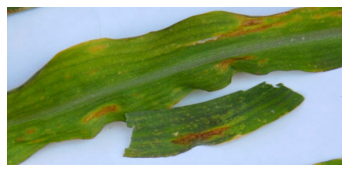

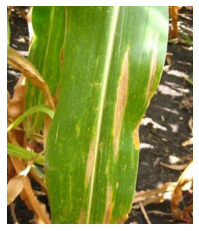

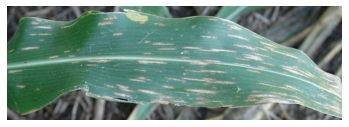

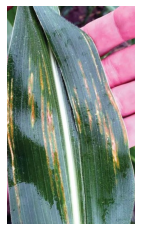

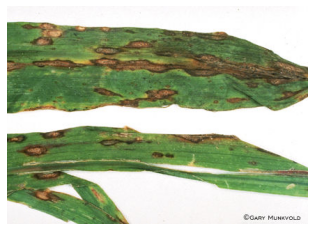


Healthy images:


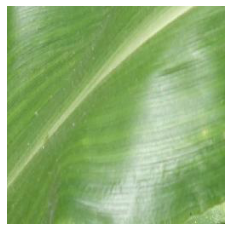

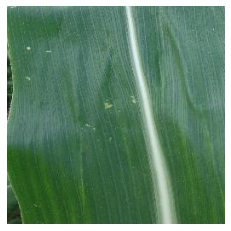

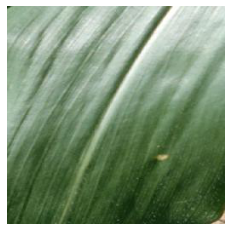

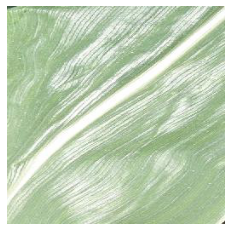

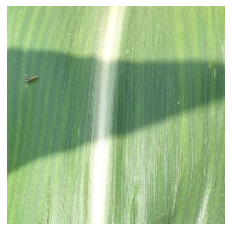


Gray_Leaf_Spot images:


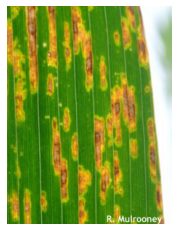

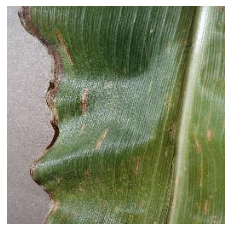

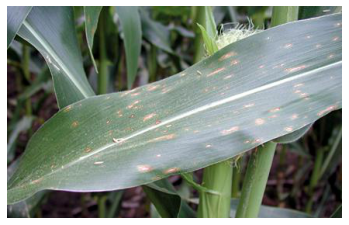

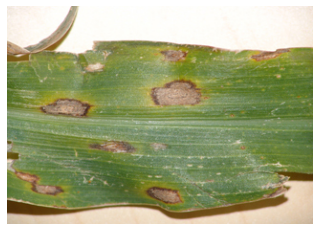

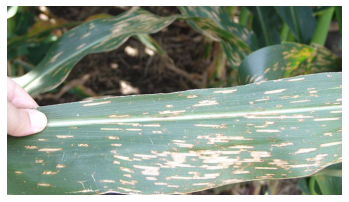

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Define a function to print the images
def show_images(directory):
    for i, file in enumerate(os.listdir(directory)):
        if i >= 5:
            break
        img_path = os.path.join(directory, file)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.show()

# Print the images from each directory
print("Blight images:")
show_images(train_dir)
print("\nHealthy images:")
show_images(test_dir)
print("\nGray_Leaf_Spot images:")
show_images(validation_dir)

In [4]:
import os

data_dir = './'
folders = ['Blight', 'Gray_Leaf_Spot', 'Healthy']

for folder in folders:
    path = os.path.join(data_dir, folder)
    num_images = len(os.listdir(path))
    print(f'{folder}: {num_images} images')


Blight: 26 images
Gray_Leaf_Spot: 27 images
Healthy: 30 images


In [5]:
import tensorflow as tf
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the dataset
with zipfile.ZipFile("leaves.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

# Define your data directory
data_dir = "/content"

# Define your image size and batch size
img_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Create train and validation data generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training")

valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation")

# Define your CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile your model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train your model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator)

# Evaluate your model on the test data
test_loss, test_acc = model.evaluate(valid_generator, verbose=2)
print("Test accuracy:", test_acc)


Found 67 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Epoch 1/10
3/3 [==============================] - 14s 6s/step - loss: -32.0091 - accuracy: 0.3134 - val_loss: -148.9122 - val_accuracy: 0.3125
Epoch 2/10
3/3 [==============================] - 12s 4s/step - loss: -262.4991 - accuracy: 0.3134 - val_loss: -931.7036 - val_accuracy: 0.3125
Epoch 3/10
3/3 [==============================] - 12s 4s/step - loss: -1155.3003 - accuracy: 0.3134 - val_loss: -3560.1704 - val_accuracy: 0.3125
Epoch 4/10
3/3 [==============================] - 12s 3s/step - loss: -4171.8784 - accuracy: 0.3134 - val_loss: -10801.9785 - val_accuracy: 0.3125
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: -11841.1250 - accuracy: 0.3134 - val_loss: -27500.5703 - val_accuracy: 0.3125
Epoch 6/10
3/3 [==============================] - 11s 3s/step - loss: -28747.0801 - accuracy: 0.3134 - val_loss: -61425.0703 - val_accuracy: 0.3125
Epoch 7/10
3/3 [============================

In [6]:
# Create train and validation data generators for diseased vs. non-diseased classification
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
    classes=['Blight', 'Gray_Leaf_Spot'])

valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
    classes=['Blight', 'Gray_Leaf_Spot'])


Found 43 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


1/1 [==============================] - 1s 569ms/step


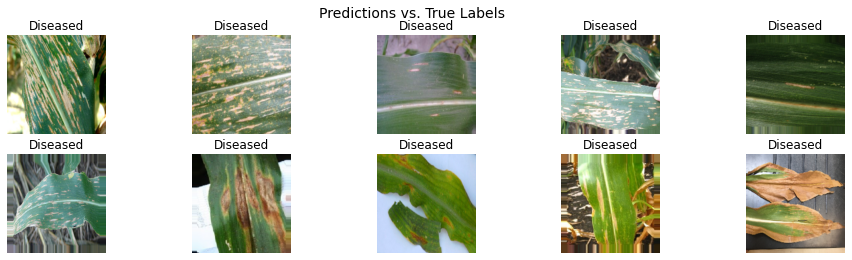

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Load the images and their true class labels
test_images, test_labels = next(valid_generator)

# Get the predicted class labels from the model
pred_labels = model.predict(test_images)
pred_labels = np.round(pred_labels)

# Plot the images in two categories based on their predicted class labels
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 4))
fig.suptitle("Predictions vs. True Labels", fontsize=14)

for i, ax in enumerate(axs.flatten()):
    if i < len(test_images):
        ax.imshow(test_images[i])
        if pred_labels[i] == 1:
            ax.set_title("Diseased")
        else:
            ax.set_title("Non-diseased")
        ax.axis("off")

plt.show()
